In [2]:
# Author: Hussain Abbas, MSc
# © 2021 Stats AI LLC 
# All Rights Reserved

import pandas as pd
import seaborn as sns
from pyod.models.copod import COPOD
from datetime import timedelta

In [3]:
df = pd.read_csv('C:/Users/deepl/Desktop/Anomaly_Detection Project/anomaly_detection.csv')

dti = pd.date_range("2016-01-01", periods=365, freq="D")

df.index = dti

X_train = df[df.index <= '2016-09-30']

X_test = df[df.index > '2016-09-30']

display(X_train, X_test)

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
2016-01-01,0.000000,0.000000,3.000000,3.000000,8.000000
2016-01-02,1.232260,-0.217305,3.193780,3.489992,7.792553
2016-01-03,2.540129,0.606709,3.180950,3.464811,7.817440
2016-01-04,5.520271,1.470812,3.330528,2.968375,7.409152
2016-01-05,5.914298,2.745060,3.061706,3.440980,7.153049
...,...,...,...,...,...
2016-09-26,14.133139,7.947718,1.800914,6.852511,9.812531
2016-09-27,13.673763,7.091657,1.611077,6.991557,9.378149
2016-09-28,12.138013,6.593396,1.228136,6.763265,9.575867
2016-09-29,11.702856,6.147422,0.825552,6.746459,9.643524


,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
2016-10-01,8.046032,5.295155,0.490067,5.972950,9.221123
2016-10-02,8.769270,4.184700,0.815883,5.476941,8.813725
2016-10-03,8.311614,4.632987,0.679195,5.056123,8.552767
2016-10-04,7.850020,3.950758,0.800483,5.045620,8.481428
2016-10-05,8.176031,3.795881,0.791072,5.016191,8.465436
...,...,...,...,...,...
2016-12-26,11.364339,-0.925751,-3.259216,6.572904,11.452315
2016-12-27,11.316572,-0.081164,-3.746738,6.252706,11.859704
2016-12-28,10.841367,-0.317127,-3.680397,6.617491,11.644486
2016-12-29,11.585932,-0.710426,-4.046116,6.519041,11.756765


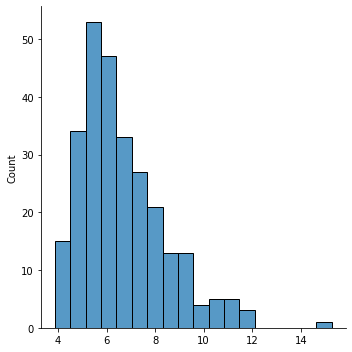

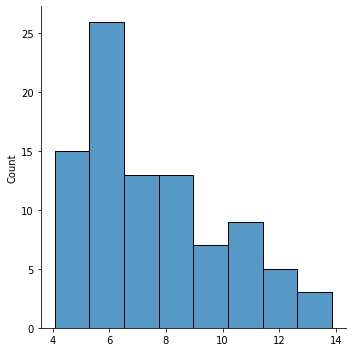

In [4]:
# train the COPOD detector
clf = COPOD()
clf.fit(X_train)

# get raw outlier scores
y_train_scores = clf.decision_scores_  
y_test_scores = clf.decision_function(X_test)  

# get binary labels (0: inliers, 1: outliers) 
y_train_pred = clf.labels_ 
y_test_pred = clf.predict(X_test)

# print outlier score distribution
display(sns.displot(y_train_scores))
display(sns.displot(y_test_scores))

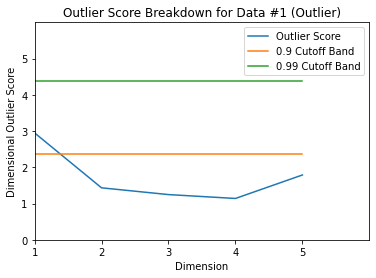

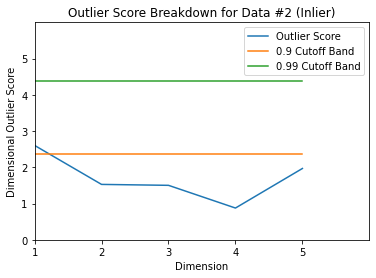

In [5]:
a, b, c = clf.explain_outlier(0)
a, b, c = clf.explain_outlier(1)

In [6]:
X_train['outlier'] = y_train_pred
X_train['outlier_score'] = y_train_scores

X_test['outlier'] = y_test_pred
X_test['outlier_score'] = y_test_scores


display(X_train, X_test)

<ipython-input-6-b08fb2e615b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['outlier'] = y_train_pred
<ipython-input-6-b08fb2e615b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['outlier_score'] = y_train_scores
<ipython-input-6-b08fb2e615b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,outlier,outlier_score
2016-01-01,0.000000,0.000000,3.000000,3.000000,8.000000,1,9.449444
2016-01-02,1.232260,-0.217305,3.193780,3.489992,7.792553,0,8.915368
2016-01-03,2.540129,0.606709,3.180950,3.464811,7.817440,0,8.015674
2016-01-04,5.520271,1.470812,3.330528,2.968375,7.409152,0,8.268666
2016-01-05,5.914298,2.745060,3.061706,3.440980,7.153049,0,7.178465
...,...,...,...,...,...,...,...
2016-09-26,14.133139,7.947718,1.800914,6.852511,9.812531,0,7.209228
2016-09-27,13.673763,7.091657,1.611077,6.991557,9.378149,0,7.176601
2016-09-28,12.138013,6.593396,1.228136,6.763265,9.575867,0,6.276495
2016-09-29,11.702856,6.147422,0.825552,6.746459,9.643524,0,6.130867


,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,outlier,outlier_score
2016-10-01,8.046032,5.295155,0.490067,5.972950,9.221123,0,5.285119
2016-10-02,8.769270,4.184700,0.815883,5.476941,8.813725,0,4.707704
2016-10-03,8.311614,4.632987,0.679195,5.056123,8.552767,0,4.635184
2016-10-04,7.850020,3.950758,0.800483,5.045620,8.481428,0,4.531716
2016-10-05,8.176031,3.795881,0.791072,5.016191,8.465436,0,4.524614
...,...,...,...,...,...,...,...
2016-12-26,11.364339,-0.925751,-3.259216,6.572904,11.452315,1,10.159554
2016-12-27,11.316572,-0.081164,-3.746738,6.252706,11.859704,1,11.025948
2016-12-28,10.841367,-0.317127,-3.680397,6.617491,11.644486,1,10.773763
2016-12-29,11.585932,-0.710426,-4.046116,6.519041,11.756765,1,12.158379


In [7]:
# Compute number of outliers in each period
display(X_train['outlier'].value_counts())
display(X_test['outlier'].value_counts())

# Compute outlier score distribution breakdown by outlier label for each period
display(X_train.groupby(["outlier"])['outlier_score'].quantile([0, 0.025, 0.5, 0.975, 1]))
display(X_test.groupby(["outlier"])['outlier_score'].quantile([0, 0.025, 0.5, 0.975, 1]))

0    246
1     28
Name: outlier, dtype: int64

0    68
1    23
Name: outlier, dtype: int64

outlier       
0        0.000     3.870575
         0.025     4.333878
         0.500     6.065151
         0.975     8.737817
         1.000     9.108401
1        0.000     9.147896
         0.025     9.161529
         0.500    10.232649
         0.975    13.099191
         1.000    15.274125
Name: outlier_score, dtype: float64

outlier       
0        0.000     4.073165
         0.025     4.290297
         0.500     6.097016
         0.975     8.720498
         1.000     8.980789
1        0.000     9.462245
         0.025     9.531259
         0.500    11.025948
         0.975    13.507007
         1.000    13.854799
Name: outlier_score, dtype: float64

In [8]:
# Create function to compute outliers according to outlier group definintions 
# outlier_day_count between 2 and 14 are defined to be outliers 

def compute_outliers(data):    
    
    count = 0
    outliers = []

    for ind, values in data.iterrows():

        if values['outlier'] == 1:
            count = count + 1
            start_date = ind - timedelta(days = count - 1)
            outliers.append([start_date, ind, count])
        else:
            count = 0  

    outliers = pd.DataFrame(outliers)
    outliers.columns = ['start_date', 'end_date', 'outlier_day_count']
    outliers = outliers.groupby('start_date')[['end_date', 'outlier_day_count']].max()
    outliers = outliers.reset_index()

    return outliers[(outliers.outlier_day_count > 2) & (outliers.outlier_day_count <= 14)]

In [9]:
# compute outliers according to our new definition as defined above

display(compute_outliers(X_train))
display(compute_outliers(X_test))

,start_date,end_date,outlier_day_count
1,2016-01-08,2016-01-10,3
3,2016-02-13,2016-02-15,3
5,2016-02-20,2016-02-24,5
6,2016-08-08,2016-08-11,4
8,2016-09-06,2016-09-09,4
9,2016-09-11,2016-09-14,4


,start_date,end_date,outlier_day_count
0,2016-11-16,2016-11-20,5
